<a href="https://colab.research.google.com/github/vitormoschetti/Rede-Neural-Fashion-MNIST/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow 
from tensorflow import keras
import matplotlib.pyplot as plt

# Carregando e explorando o dataset [FASHION_MNIST](https://github.com/zalandoresearch/fashion-mnist)

In [ ]:
dataset = keras.datasets.fashion_mnist #dataset com a coleção de imagens de roupas
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

print("qtd imagens de treino:", len(imagens_treino))
print("qtd imagens de teste:", len(imagens_teste))
print("formato de cada item:", imagens_treino[0].shape)
print("tipos de classificações possíveis:", np.unique(identificacoes_treino))
print("qtd de classificações:", len(np.unique(identificacoes_treino)))
print("formado das imagens:", imagens_treino[0])


4431872/4422102 [==============================] - 0s 0us/step
qtd imagens de treino: 60000
qtd imagens de teste: 10000
formato de cada item: (28, 28)
tipos de classificações possíveis: [0 1 2 3 4 5 6 7 8 9]
qtd de classificações: 10
formado das imagens: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0  

# Array com o nome de cada identificação 


In [ ]:
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 
                           'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

# Visualizando imagem do dataset


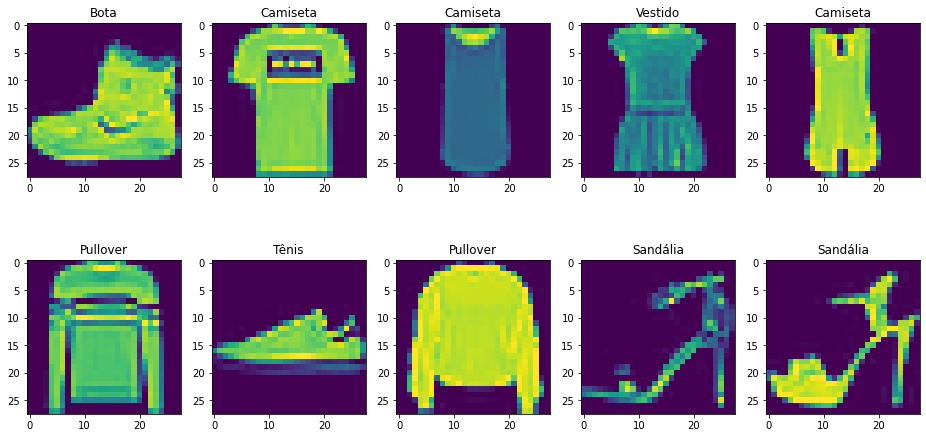

In [ ]:
plt.rcParams["figure.figsize"] = (16,8)
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

# Escala de cores e normalização

#### na escala de cores padrão, a cor do pixel varia de 0 a 255 possibilidades, com escala de azul até amarelo.



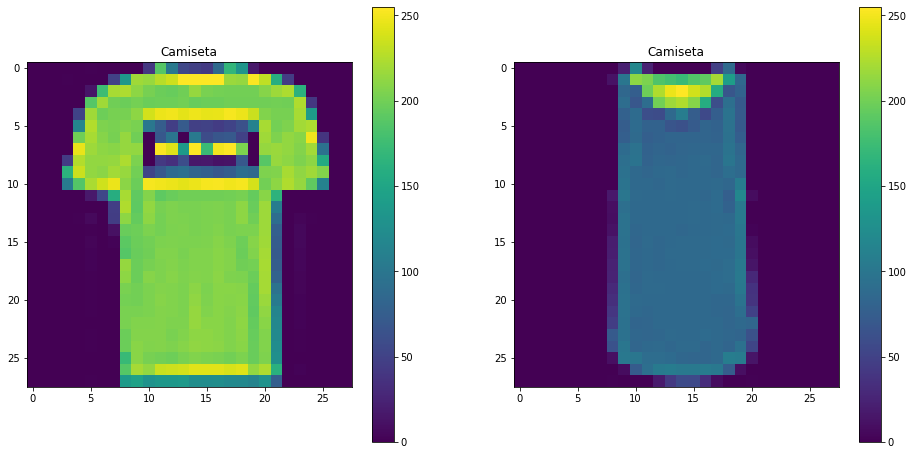

In [ ]:
plt.rcParams["figure.figsize"] = (16,8)
for imagem in range(2):
  plt.subplot(1, 2, imagem+1)
  plt.imshow(imagens_treino[imagem+1])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem+1]])
  plt.colorbar()


imagens_treino = imagens_treino/float(255)

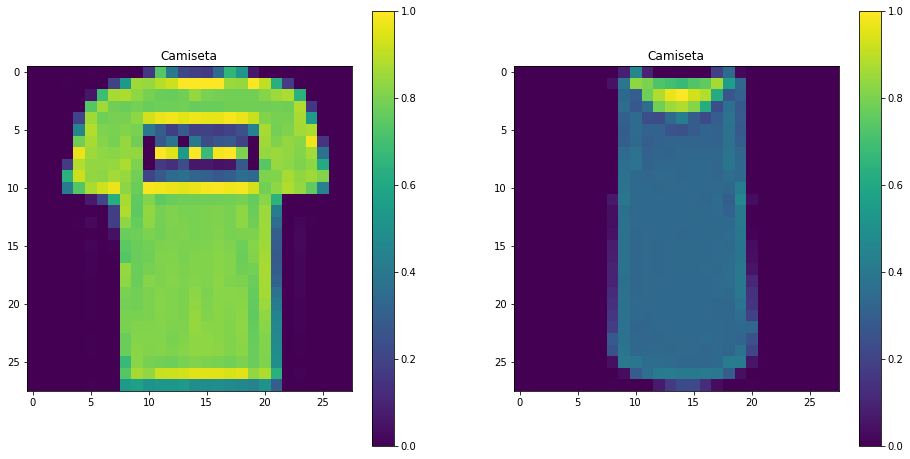

In [ ]:

plt.rcParams["figure.figsize"] = (16,8)
for imagem in range(2):
  plt.subplot(1, 2, imagem+1)
  plt.imshow(imagens_treino[imagem+1])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem+1]])
  plt.colorbar()

# Criando o modelo 
##### entrada -> imagens do dataset
##### processamento -> funções que extraem as características
##### saída -> classificação

#### camada 0
###### responsável por organizar os pixels da imagem (de 28 dimensões) (28 x 28) em uma única dimesão com 784 pixels

#### camada 1
###### camada dense, ou camada totalmente conectada com a camada 0
###### função de ativação - relu - aqui todo número negativo vindo da camada 0 se tornam 0. Números positivos se mantêm. Com a transformação dos números negativos em 0, a relu implementa uma função não linear a nossa rede neural.

#### saída
###### camada dense com a camada 1 com 10 classificações de saída.
###### função de ativação - probabilisca softmax. Transforma a entrada da camada em uma porcentagem. A categoria com a maior porcentagem é definida com maior probabilidade de ser a categoria do produto de entrada. A soma de todas as categorias é 1.



In [ ]:
imagem_shape = (28, 28) # dimensões das imagens do dataset

# processamento das camadas em sequência (entrada, processamento, saida)
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape = imagem_shape),
  keras.layers.Dense(256, activation=tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

#### compilando e treinando o modelo

###### otimizador vai deixar o treino melhor - pesquisar mais sobre
###### perda - quando nossa rede classifica um valor de saída errado, houve uma perda - entropia categorica cruzada esparsa - calculo do erro por categorias cruzadas abrangente 

###### validation - porcentagemv para validação

In [ ]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)
historico.history

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5275 - accuracy: 0.8106 - val_loss: 0.4181 - val_accuracy: 0.8469
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3975 - accuracy: 0.8562 - val_loss: 0.3563 - val_accuracy: 0.8738
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3605 - accuracy: 0.8681 - val_loss: 0.3567 - val_accuracy: 0.8671
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3401 - accuracy: 0.8735 - val_loss: 0.3405 - val_accuracy: 0.8748
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3232 - accuracy: 0.8799 - val_loss: 0.3312 - val_accuracy: 0.8783


{'accuracy': [0.8105624914169312,
  0.856208324432373,
  0.8680833578109741,
  0.8734999895095825,
  0.879895806312561],
 'loss': [0.5274609923362732,
  0.39746230840682983,
  0.36046773195266724,
  0.34009578824043274,
  0.3232153058052063],
 'val_accuracy': [0.846916675567627,
  0.8738333582878113,
  0.8670833110809326,
  0.874833345413208,
  0.878333330154419],
 'val_loss': [0.4180838167667389,
  0.3563273847103119,
  0.35666874051094055,
  0.3405079245567322,
  0.3311651051044464]}

## Gráfico do modelo

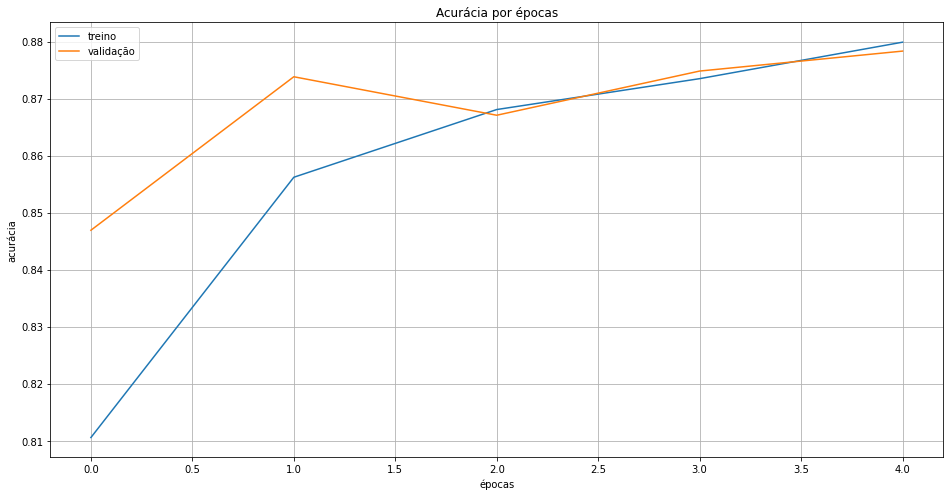

In [ ]:
plt.grid(True)
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

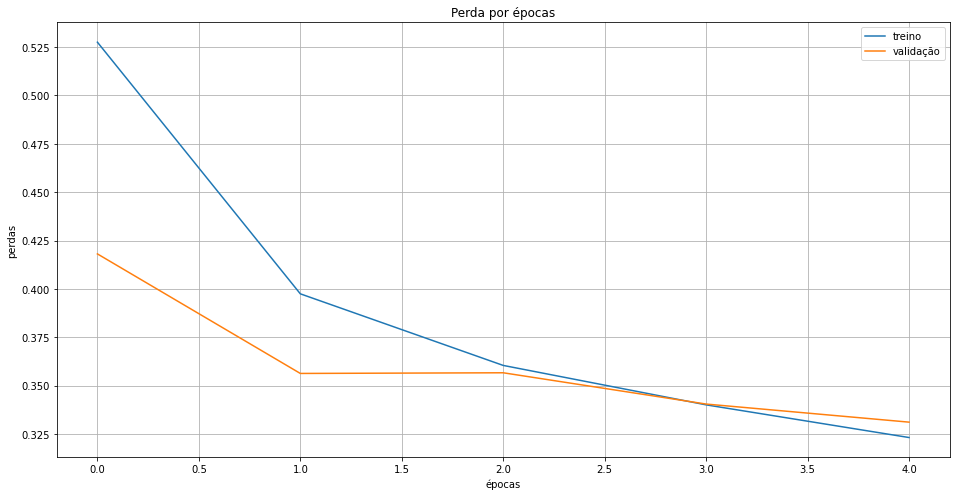

In [ ]:
plt.grid(True)
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perdas')
plt.legend(['treino', 'validação'])

## Testando o modelo 

In [ ]:
testes = modelo.predict(imagens_teste)

perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste', perda_teste)
print('Acurácia do teste', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 52.6677 - accuracy: 0.8648
Perda do teste 52.667724609375
Acurácia do teste 0.864799976348877
